In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy

from Mod.Fits import Fits

In [30]:
with open("Data/stima tempo caratteristico.csv", "r") as file:
    df = pd.read_csv(file, delimiter=";", decimal=",")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3039 entries, 0 to 3038
Data columns (total 1 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Position (mm) Run #1  3039 non-null   float64
dtypes: float64(1)
memory usage: 23.9 KB


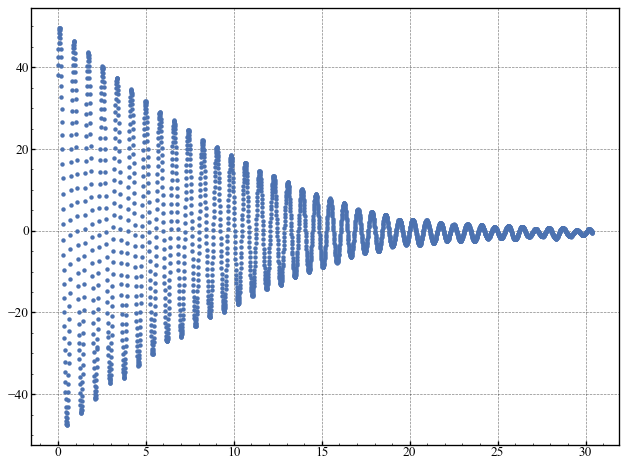

In [32]:
plt.style.use("Mod/mystyle.mplstyle")

fig, ax = plt.subplots()

X = np.linspace(0, 30.39, 3039)
Y = df.iloc[:, 0].tolist()

ax.scatter(X, Y)

In [33]:
params, std_dev = Fits.smorzato(X, Y)
params2, std_dev2 = Fits.smorzato2(X, Y, 7.75)

print(f"Parametri: {params},\nStd_dev: {std_dev}\n")
print(f"Parametri: {params2},\nStd_dev: {std_dev2}\n")

Parametri: [54.81785173  0.12507536  7.75124984 -0.81058281 -0.2536261 ],
Std_dev: [0.24193439 0.00079466 0.00080738 0.00455734 0.044372  ]

Parametri: [ 6.26690933e+01  5.17173693e-03 -7.93691497e-01 -2.94835717e-01],
Std_dev: [7.49205496e-01 7.37967062e-05 6.32596497e-03 8.42315110e-02]



In [44]:
print(
    f"Curva1 gamma: {params[1]}, omega: {params[2]}\n\tDa cui gamma^2/omega^2: {params[1]**2/params[2]**2}"
)
print(
    f"Curva2 gamma: {params2[1]}, omega: {params2[2]}\n\tDa cui gamma^2/omega^2: {params2[1]**2/params2[2]**2}"
)

print("Quindi sono trascurabili")

Curva1 gamma: 0.12507536138328035, omega: 7.751249843311912
	Da cui gamma^2/omega^2: 0.00026037546682403594
Curva2 gamma: 0.005171736932490023, omega: -0.7936914965721305
	Da cui gamma^2/omega^2: 4.245896435279456e-05
Quindi sono trascurabili


In [34]:
def curve(x, a, b, c, phi, d):
    return a * np.exp(-b * x) * np.cos(c * x + phi) + d


def curve2(x, a, b, phi, c, omega):
    return np.multiply(a / (1 + a * b * x), np.cos(omega * x + phi)) + c

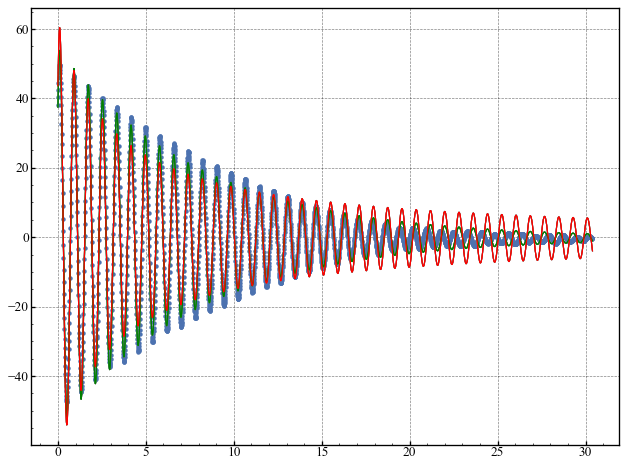

In [40]:
ax.plot(X, curve(X, *params), c="g")
ax.plot(X, curve2(X, *params2, 7.75), c="r")

fig